In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read the CSV file into a DataFrame
birth_data = pd.read_csv('C:/Users/knoon/OneDrive/Desktop/data analytics program/projects/US birth data.csv')

# Display the DataFrame
print(birth_data.head)



In [8]:
#looks like we have good clean data
null_counts = birth_data.isnull().sum()
print(null_counts)

State                            0
State Abbreviation               0
Year                             0
Gender                           0
Education Level of Mother        0
Education Level Code             0
Number of Births                 0
Average Age of Mother (years)    0
Average Birth Weight (g)         0
dtype: int64


In [9]:
summary_stats = birth_data.describe()
print(summary_stats)

              Year  Education Level Code  Number of Births  \
count  5496.000000           5496.000000       5496.000000   
mean   2018.500728              3.026201       4115.443959   
std       1.707554              4.733406       6687.036797   
min    2016.000000             -9.000000         10.000000   
25%    2017.000000              2.000000        559.000000   
50%    2019.000000              4.000000       1692.000000   
75%    2020.000000              6.000000       5140.000000   
max    2021.000000              8.000000      59967.000000   

       Average Age of Mother (years)  Average Birth Weight (g)  
count                    5496.000000               5496.000000  
mean                       29.552274               3250.887627  
std                         2.779735                114.456090  
min                        23.100000               2451.900000  
25%                        27.500000               3182.200000  
50%                        29.600000               

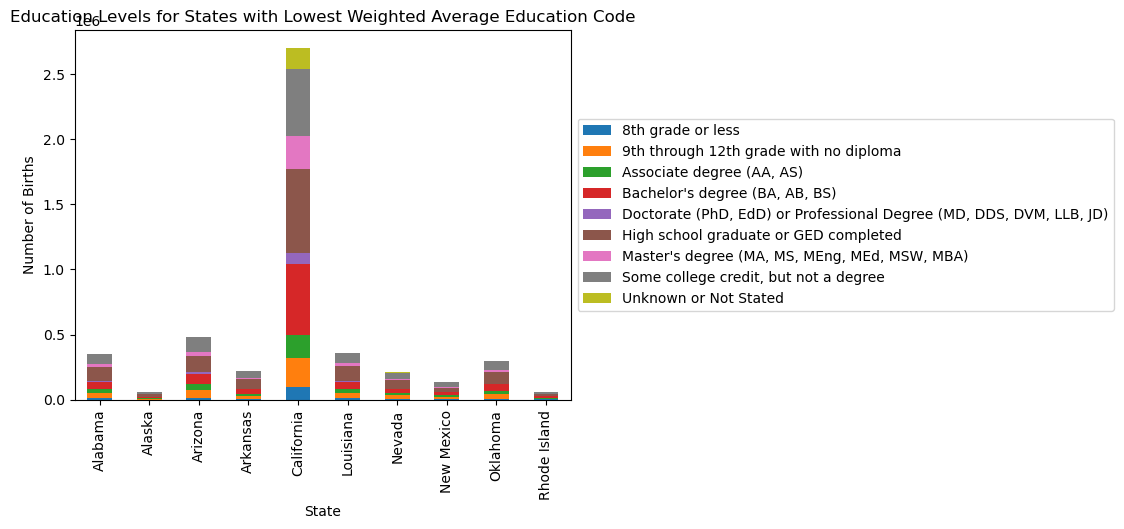

In [30]:
# Calculate the weighted average education code for each state
birth_data['Weighted Education Code'] = birth_data['Education Level Code'] * birth_data['Number of Births']
weighted_average_education = birth_data.groupby('State')['Weighted Education Code'].sum() / birth_data.groupby('State')['Number of Births'].sum()

# Filter the data for the 10 states with the lowest weighted average education code
lowest_avg_education_states = weighted_average_education.nsmallest(10).index
filtered_data = birth_data[birth_data['State'].isin(lowest_avg_education_states)]

# Group the filtered data by State and Education Level and calculate the counts
grouped_data = filtered_data.groupby(['State', 'Education Level of Mother'])['Number of Births'].sum().unstack()

# Create the stacked bar chart
ax = grouped_data.plot(kind='bar', stacked=True)

# Set the chart title and labels
plt.title('Education Levels for States with Lowest Weighted Average Education Code')
plt.xlabel('State')
plt.ylabel('Number of Births')

# Move the legend to the left
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

# Display the chart
plt.show()



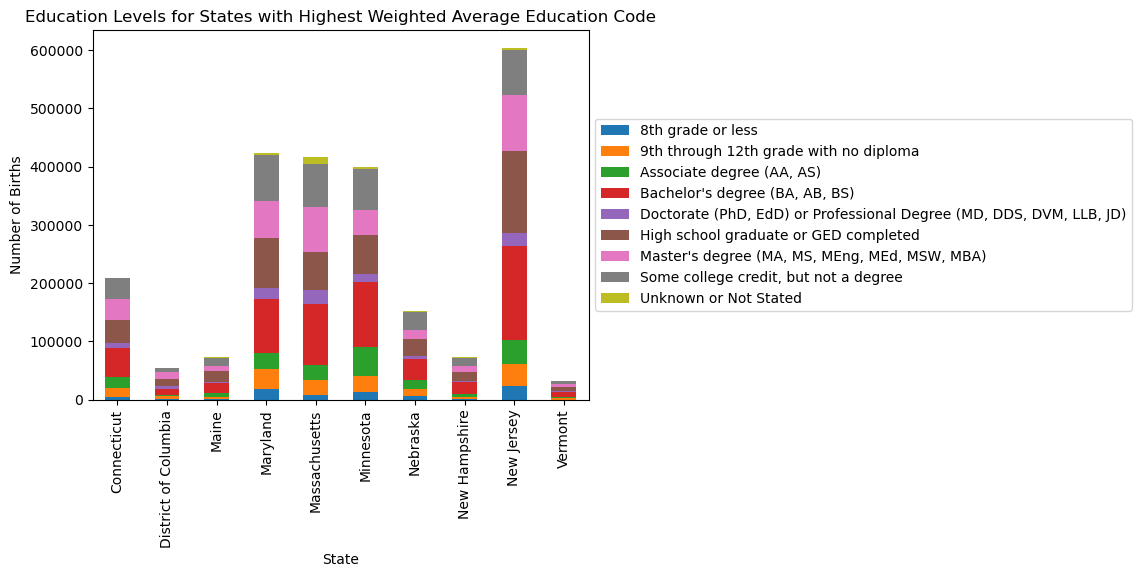

In [31]:
# Calculate the weighted average education code for each state
birth_data['Weighted Education Code'] = birth_data['Education Level Code'] * birth_data['Number of Births']
weighted_average_education = birth_data.groupby('State')['Weighted Education Code'].sum() / birth_data.groupby('State')['Number of Births'].sum()

# Filter the data for the 10 states with the highest weighted average education code
highest_avg_education_states = weighted_average_education.nlargest(10).index
filtered_data = birth_data[birth_data['State'].isin(highest_avg_education_states)]

# Group the filtered data by State and Education Level and calculate the counts
grouped_data = filtered_data.groupby(['State', 'Education Level of Mother'])['Number of Births'].sum().unstack()

# Create the stacked bar chart
ax = grouped_data.plot(kind='bar', stacked=True)

# Set the chart title and labels
plt.title('Education Levels for States with Highest Weighted Average Education Code')
plt.xlabel('State')
plt.ylabel('Number of Births')

# Move the legend to the left
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

# Display the chart
plt.show()



In [29]:
# Calculate the weighted average education code for each state
birth_data['Weighted Education Code'] = birth_data['Education Level Code'] * birth_data['Number of Births']
weighted_average_education = birth_data.groupby('State')['Weighted Education Code'].sum() / birth_data.groupby('State')['Number of Births'].sum()

# Get the top 10 highest and lowest weighted averages
top_10_highest = weighted_average_education.nlargest(10)
top_10_lowest = weighted_average_education.nsmallest(10)

# Display the top 10 highest and lowest weighted averages
print("Top 10 Highest Weighted Averages:")
print(top_10_highest)
print()
print("Top 10 Lowest Weighted Averages:")
print(top_10_lowest)

Top 10 Highest Weighted Averages:
State
Connecticut             4.832046
District of Columbia    4.820339
New Hampshire           4.818264
Vermont                 4.691666
Massachusetts           4.657904
New Jersey              4.655283
Minnesota               4.643916
Maryland                4.559107
Maine                   4.549844
Nebraska                4.533176
dtype: float64

Top 10 Lowest Weighted Averages:
State
Nevada          3.570156
California      3.583786
Arkansas        3.886034
Louisiana       3.940213
New Mexico      3.942034
Rhode Island    3.954995
Oklahoma        3.957314
Alaska          4.001871
Arizona         4.007780
Alabama         4.010292
dtype: float64


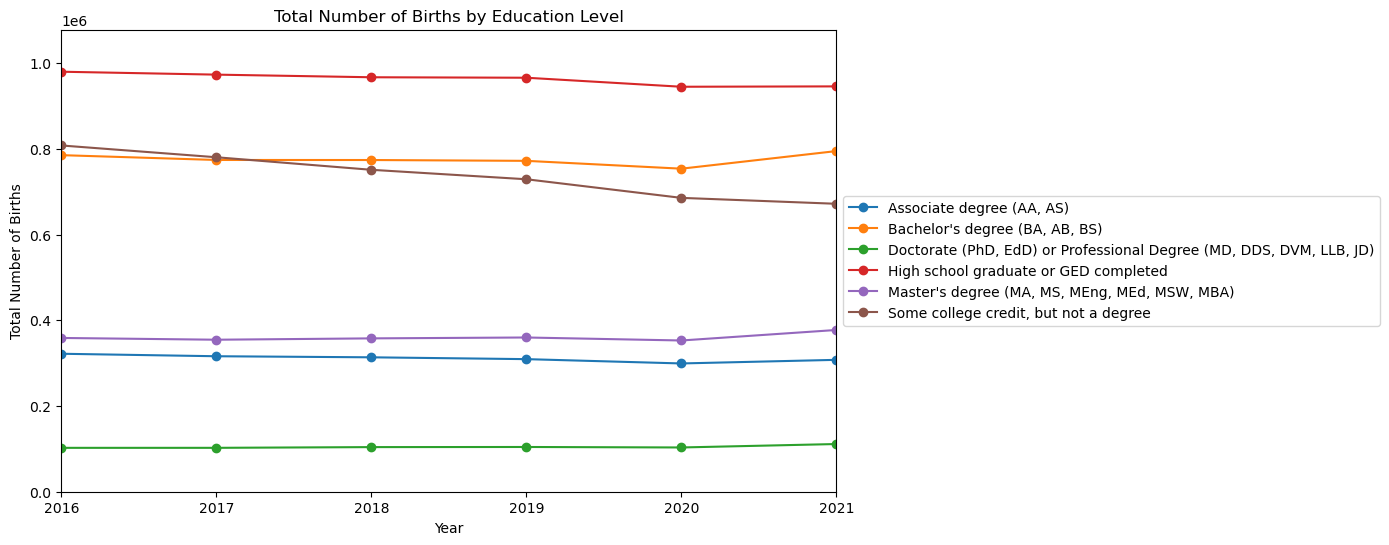

In [34]:
# Filter the data for the desired education levels
education_levels = ["Bachelor's degree (BA, AB, BS)",
                    'High school graduate or GED completed',
                    'Some college credit, but not a degree',
                    'Associate degree (AA, AS)',
                    "Master's degree (MA, MS, MEng, MEd, MSW, MBA)",
                    'Doctorate (PhD, EdD) or Professional Degree (MD, DDS, DVM, LLB, JD)']
filtered_data = birth_data[birth_data['Education Level of Mother'].isin(education_levels)].copy()

# Convert 'Year' column to datetime format
filtered_data['Year'] = pd.to_datetime(filtered_data['Year'], format='%Y')

# Filter the data for the period 2016 to 2021
filtered_data = filtered_data[(filtered_data['Year'] >= '2016') & (filtered_data['Year'] <= '2021')]

# Group the filtered data by Year and Education Level and calculate the total births
grouped_data = filtered_data.groupby(['Year', 'Education Level of Mother'])['Number of Births'].sum().unstack()

# Plot the time series
ax = grouped_data.plot(marker='o', linestyle='-', figsize=(10, 6))

# Set the chart title and labels
plt.title('Total Number of Births by Education Level')
plt.xlabel('Year')
plt.ylabel('Total Number of Births')

# Set the y-axis limits
plt.ylim(0, grouped_data.values.max() * 1.1)

# Move the legend to the left
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

# Display the chart
plt.show()

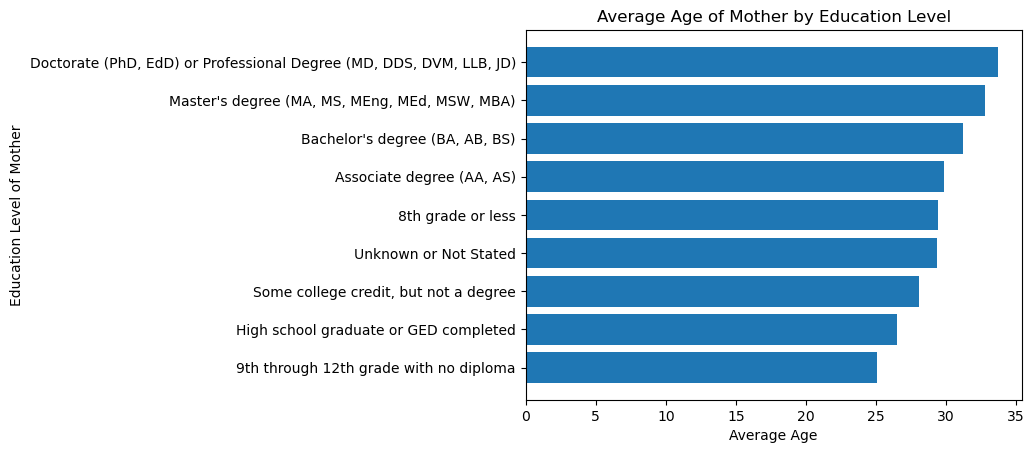

In [36]:
# Group the data by Education Level of Mother and calculate the average age
average_age_by_education = birth_data.groupby('Education Level of Mother')['Average Age of Mother (years)'].mean()

# Sort the data by average age in ascending order
average_age_sorted = average_age_by_education.sort_values()

# Create the horizontal bar chart
plt.barh(average_age_sorted.index, average_age_sorted)

# Set the chart title and labels
plt.title('Average Age of Mother by Education Level')
plt.xlabel('Average Age')
plt.ylabel('Education Level of Mother')

# Display the chart
plt.show()

C:\Users\knoon\AppData\Local\Temp\ipykernel_9444\316916039.py:39: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


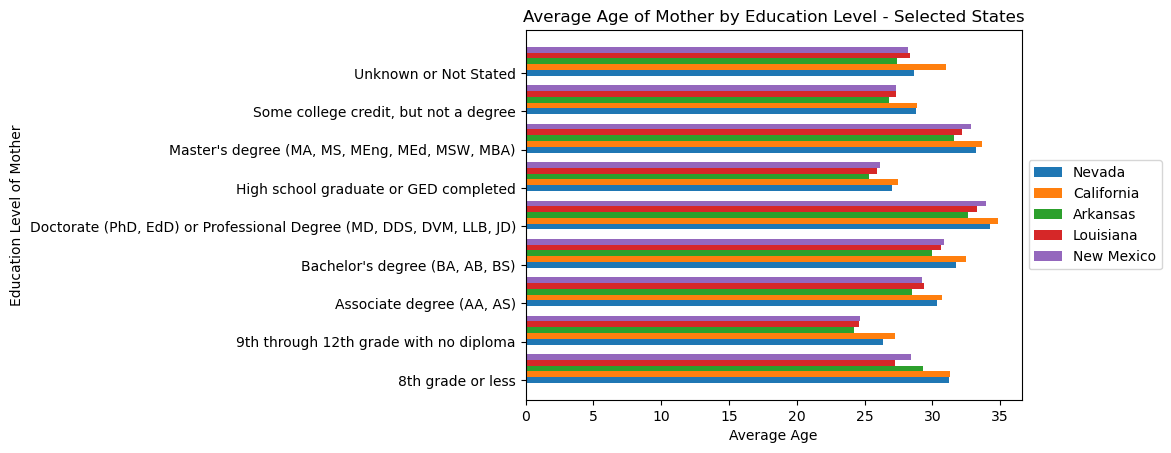

In [42]:
# Filter the data for the specific states
selected_states = ['Nevada', 'California', 'Arkansas', 'Louisiana', 'New Mexico']
filtered_data = birth_data[birth_data['State'].isin(selected_states)]

# Group the filtered data by State and Education Level of Mother, and calculate the average age
average_age_by_state_education = filtered_data.groupby(['State', 'Education Level of Mother'])['Average Age of Mother (years)'].mean()

# Create a horizontal bar chart for all states
fig, ax = plt.subplots()

# Get unique education levels
education_levels = np.unique(average_age_by_state_education.index.get_level_values('Education Level of Mother'))

# Set the bar width
bar_width = 0.15

# Set the positions of the bars on the y-axis
bar_positions = np.arange(len(education_levels))

# Plot the horizontal bars for each state
for i, state in enumerate(selected_states):
    state_data = average_age_by_state_education.loc[state]
    state_bar_positions = bar_positions + i * bar_width
    ax.barh(state_bar_positions, state_data, height=bar_width, label=state)

# Set the y-axis labels as the education levels
ax.set_yticks(bar_positions)
ax.set_yticklabels(education_levels)

# Set the chart title and labels
plt.title('Average Age of Mother by Education Level - Selected States')
plt.xlabel('Average Age')
plt.ylabel('Education Level of Mother')

# Add a legend to the right of the chart
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Adjust the layout to avoid label overlap
plt.tight_layout()

# Display the chart
plt.show()
